# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
# Scikit-learn: Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    root_mean_squared_error,
    confusion_matrix,
    classification_report,
    r2_score
)

# Statsmodels: For statistical modeling and inference
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import zscore
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.decomposition import FactorAnalysis

# 1. Data Loading and Inspection

In [3]:
file_path = r'C:\Users\saman\workspace\data_analysis_internship\Project_3\doc\data\raw_sales_data_week_3.csv'

In [4]:
raw_sales_data = pd.read_csv(file_path, sep= ',')

In [5]:
raw_sales_data.head()

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,NaN,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,N


In [6]:
print(raw_sales_data.shape)

(24, 8)


In [7]:
print(raw_sales_data.columns)

Index(['Customer_ID', 'Customer_Name', 'Region', 'Total_Spend',
       'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index',
       'Churned'],
      dtype='object')


In [8]:
print(raw_sales_data.dtypes)

Customer_ID             int64
Customer_Name          object
Region                 object
Total_Spend             int64
Purchase_Frequency      int64
Marketing_Spend         int64
Seasonality_Index     float64
Churned                object
dtype: object


In [9]:
raw_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         24 non-null     int64  
 1   Customer_Name       24 non-null     object 
 2   Region              24 non-null     object 
 3   Total_Spend         24 non-null     int64  
 4   Purchase_Frequency  24 non-null     int64  
 5   Marketing_Spend     24 non-null     int64  
 6   Seasonality_Index   23 non-null     float64
 7   Churned             24 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ KB


In [10]:
print(raw_sales_data.duplicated().sum())

0


In [11]:
print(raw_sales_data.isnull().sum())

Customer_ID           0
Customer_Name         0
Region                0
Total_Spend           0
Purchase_Frequency    0
Marketing_Spend       0
Seasonality_Index     1
Churned               0
dtype: int64


In [12]:
# Fill missing Seasonality_Index with median
raw_sales_data['Seasonality_Index'] = raw_sales_data['Seasonality_Index'].fillna(raw_sales_data['Seasonality_Index'].median())

In [13]:
# Normalize Churned values
raw_sales_data['Churned'] = raw_sales_data['Churned'].astype(str).str.strip().str.capitalize()

In [14]:
raw_sales_data['Churned'] = raw_sales_data['Churned'].replace({'Y': 'Yes', 'N': 'No'})

In [15]:
raw_sales_data

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.1,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [16]:
#raw_sales_data.to_csv(r'C:\Users\saman\workspace\data_analysis_internship\Project_3\doc\data\cleaned_sales_data_week_3.csv', index=False)

In [17]:
# Select relevant columns for sales data

sales_data = raw_sales_data.iloc[:, 3:7] 

In [18]:
sales_data

,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index
0,5000,12,2000,1.2
1,3000,8,1500,1.1
2,4500,10,1800,1.1
3,2500,5,1000,0.9
4,7000,15,2500,1.3
5,3200,7,1400,1.0
6,5300,14,2300,1.2
7,2900,6,1100,0.8
8,6000,13,2200,1.2
9,3100,8,1350,0.9


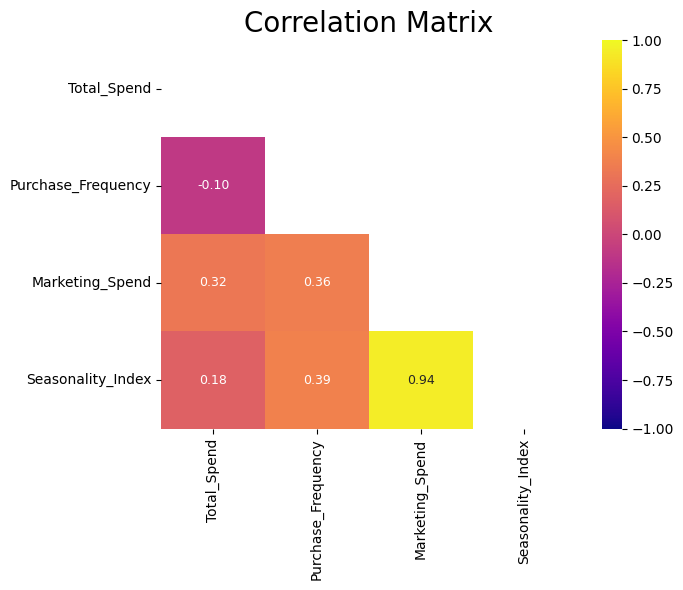

In [19]:
# Calculate the correlation matrix
corr = sales_data.corr()

# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='plasma', cbar=True, annot_kws={"size": 9}, vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

It shows strong correlation between marketing spend and seasonality index [0.94]. Strong multicollinearity can confuse linear models (they struggle to differentiate the impact of highly correlated features)

In [20]:
# Calculate Z-scores for each column to identify outliers

z_score_columns = sales_data.columns
z_scores = sales_data[z_score_columns].apply(zscore)

z_scores.head()

,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index
0,-0.072238,-0.043292,0.762140,1.145743
1,-0.286144,-0.287765,-0.353187,0.422116
2,-0.125714,-0.165528,0.316009,0.422116
3,-0.339621,-0.471119,-1.468513,-1.025139
4,0.141668,0.140063,1.877466,1.869370


In [21]:
# Filter out rows with any Z-score > 3 or < -3 in any column
filtered_data = sales_data[(z_scores.abs() < 3).all(axis=1)]

print(f"Original rows: {sales_data.shape[0]}, After removing outliers: {filtered_data.shape[0]}")

Original rows: 24, After removing outliers: 22


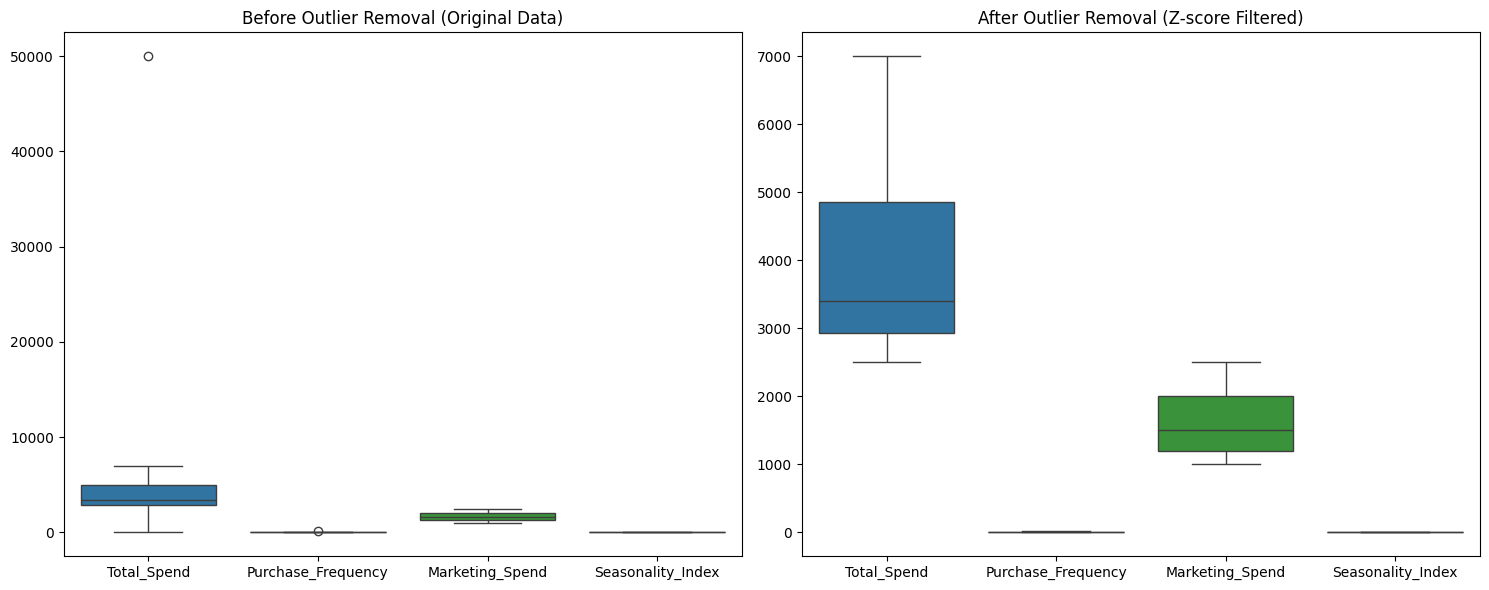

Rows before cleaning: 24
Rows after cleaning: 22


In [22]:
# Plot before and after boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before cleaning
sns.boxplot(data=sales_data, ax=axes[0])
axes[0].set_title('Before Outlier Removal (Original Data)')

# After cleaning
sns.boxplot(data=filtered_data, ax=axes[1])
axes[1].set_title('After Outlier Removal (Z-score Filtered)')

plt.tight_layout()
plt.show()

print(f"Rows before cleaning: {sales_data.shape[0]}")
print(f"Rows after cleaning: {filtered_data.shape[0]}")

In [23]:
# checking class imbalance
print(raw_sales_data['Churned'].value_counts())

Churned
Yes    13
No     11
Name: count, dtype: int64


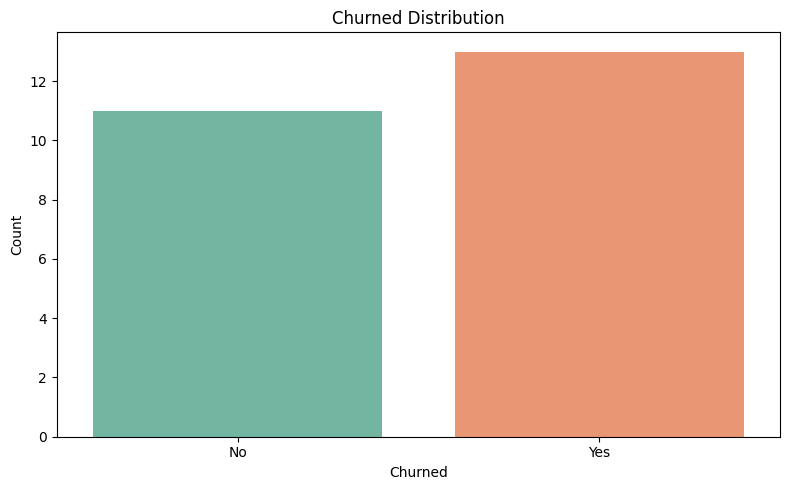

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churned', data=raw_sales_data, hue= raw_sales_data.Churned, palette='Set2')
plt.title('Churned Distribution')   
plt.xlabel('Churned')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Predictive Modeling for Sales Forecasting

## Linear Regression

In [25]:
# Prepare features and target
X = filtered_data[['Marketing_Spend', 'Seasonality_Index']]
y = filtered_data['Total_Spend']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Used StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

print(f"Regression Co-efficients:", lr.coef_, lr.intercept_)

RMSE: 21.69
R^2 Score: 0.86
Regression Co-efficients: [924.44038178 249.20229739] 3894.1176470588234


RMSE – Root Mean Squared Error : how far your model’s predictions are from the actual value
R² – Coefficient of Determination : explains how much of the variance in your target variable is explained by the model. It ranges from -∞ to 1.

R² = 0.86 means 86% of the variance in Total_Spend is explained by Marketing_Spend and Seasonality_Index, which is quite strong.

RMSE = 21.69 indicates your average prediction error is relatively low 

regression co-efficients: These values represent slope — they show which feature has more impact on Total_Spend. In this case, Marketing_Spend has a much stronger effect than Seasonality_Index.

lr.intercept_: 3894.12
This is the predicted Total_Spend when both inputs are zero (in standardized units, meaning average values).

## Logistic Regression 

In [28]:
# Encode target variable
le = LabelEncoder()
raw_sales_data['Churned'] = le.fit_transform(raw_sales_data['Churned'])  # 'Yes'=1, 'No'=0

# Features and target
features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency']
X = raw_sales_data[features]
y = raw_sales_data['Churned']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
 [[3 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [29]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-validated accuracy: 0.96 ± 0.08


The result is too perfect for a small test data. Mean Accuracy = 0.96 means that the model precisely classifies 96% predicting churn. Standard Deviation = 0.08. A standard deviation of 0.08 indicates moderate variability across the 5 cross-validation folds.

# 3. Statistical Analysis for Business Insights

Hypotheses:

H₀ (Null Hypothesis): All regions have the same average Total Spend.

H₁ (Alternative Hypothesis): At least one region's average Total Spend is different.

In [30]:
# Anova test to perform sales analysis over different regions

region_1 = raw_sales_data[raw_sales_data['Region'] == 'North']['Total_Spend']
region_2 = raw_sales_data[raw_sales_data['Region'] == 'South']['Total_Spend']
region_3 = raw_sales_data[raw_sales_data['Region'] == 'East']['Total_Spend']
region_4 = raw_sales_data[raw_sales_data['Region'] == 'West']['Total_Spend']
f_statistic, p_value = f_oneway(region_1, region_2, region_3, region_4)
print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There are significant differences in Total Spend across regions.")
else:
    print("No significant differences in Total Spend across regions.")

F-statistic: 1.36, p-value: 0.2822
No significant differences in Total Spend across regions.


F-statistic tells you how much the group means vary compared to within-group variation.

p-value > 0.05 → Can not Reject H₀ → There is no significant difference in sales across regions.

## Hypothesis Testing: Impact of Promotions on Sales


### Method: Independent two-sample t-test comparing Total_Spend between:

Customers with promotions (above-median Marketing Spend)

Customers without promotions (at or below-median Marketing Spend)

H₀: Promotions do not affect Total Spend

H₁: Promotions increase Total Spend

In [31]:
# Split based on Marketing Spend (above vs below/equal to median)
median_spend = raw_sales_data['Marketing_Spend'].median()
promo_group = raw_sales_data[raw_sales_data['Marketing_Spend'] > median_spend]['Total_Spend']
non_promo_group = raw_sales_data[raw_sales_data['Marketing_Spend'] <= median_spend]['Total_Spend']

# T-test
t_stat, p_val = ttest_ind(promo_group, non_promo_group)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Promotions significantly affect total spend.")
else:
    print("No significant impact of promotions on total spend. Null hypothesis cannot be rejected.")

T-statistic: 1.42
P-value: 0.1683
No significant impact of promotions on total spend. Null hypothesis cannot be rejected.


In [32]:
# Factor Analysis:

# Choose relevant features
features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency', 'Total_Spend']
X = raw_sales_data[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_factors = fa.fit_transform(X_scaled)

# Check loadings
factor_loadings = pd.DataFrame(fa.components_.T, columns=['Factor 1', 'Factor 2'], index=features)
print(factor_loadings)


                    Factor 1  Factor 2
Marketing_Spend     0.979220  0.075771
Seasonality_Index   0.971270 -0.112767
Purchase_Frequency  0.382622 -0.242427
Total_Spend         0.269931  0.745815


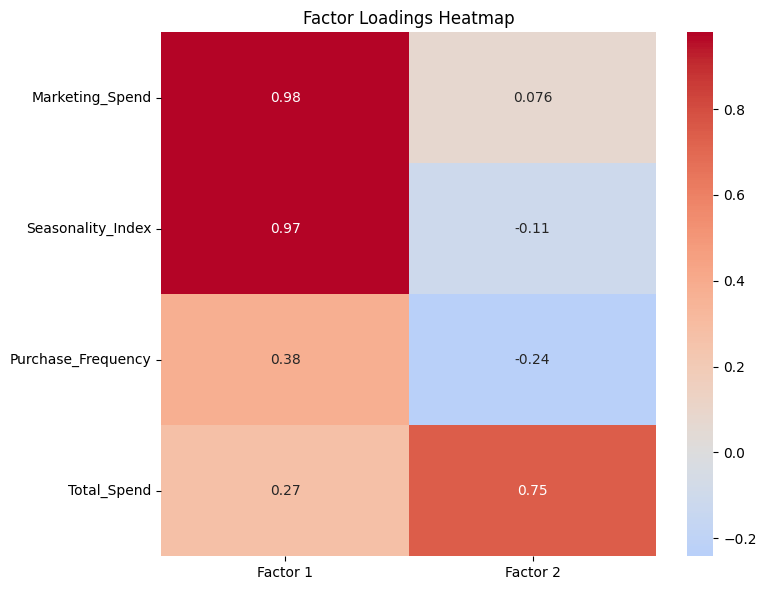

In [33]:
# visualize loadings
plt.figure(figsize=(8, 6))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Factor Loadings Heatmap")
plt.tight_layout()
plt.show()

Marketing_Spend and Seasonality_Index have high loadings on Factor1 → Factor1 represents "Marketing Influence".


Total_Spend have high loading on Factor2 which represents total customer spending power possibly influenced by marketing.

# Machine Learning for Customer Segmentation

1. Decision Tree: Customer Segmentation by Purchasing Behavior

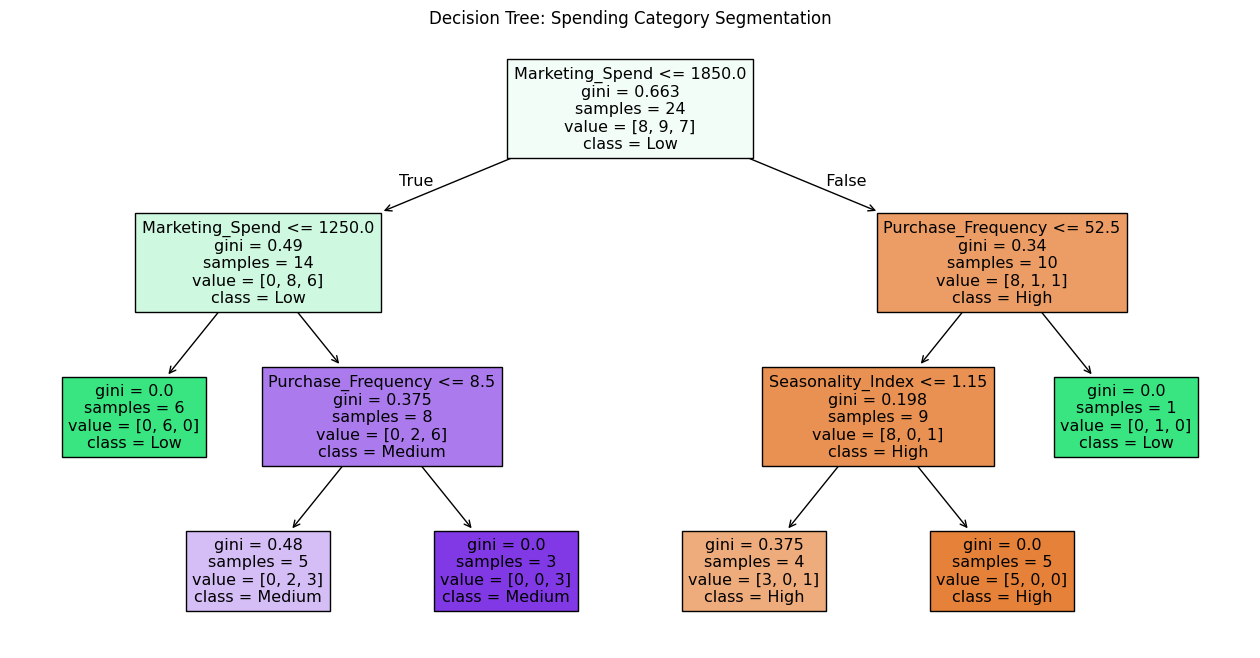

In [34]:
# Define spending category
raw_sales_data['Spending_Category'] = pd.qcut(raw_sales_data['Total_Spend'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency']
X = raw_sales_data[features]
y = raw_sales_data['Spending_Category']

# Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X, y)

# Visualize
plt.figure(figsize=(16, 8))
plot_tree(dtree, feature_names=features, class_names=dtree.classes_, filled=True)
plt.title("Decision Tree: Spending Category Segmentation")
plt.show()


2. K-Means Clustering: Group Customers by Spending Behavior

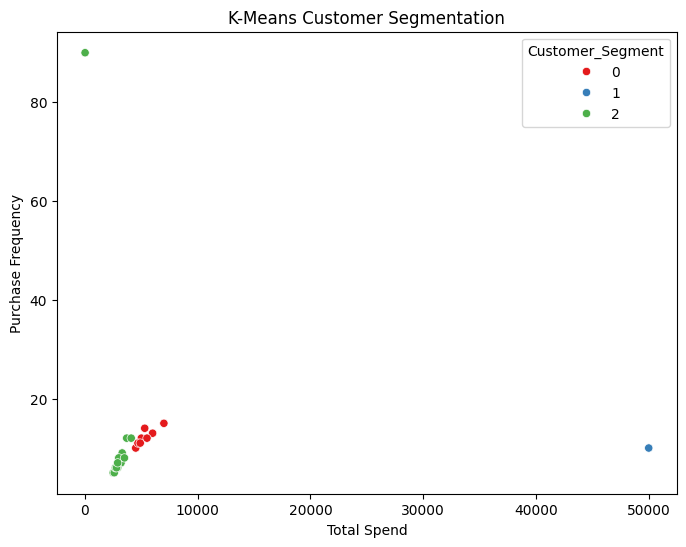

In [35]:
# K-Means clustering (3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
raw_sales_data['Customer_Segment'] = kmeans.fit_predict(raw_sales_data[['Total_Spend', 'Purchase_Frequency']])

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=raw_sales_data, x='Total_Spend', y='Purchase_Frequency', hue='Customer_Segment', palette='Set1')
plt.title('K-Means Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.show()


3. Ensemble Learning: Random Forest & XGBoost

In [41]:
# Random Forest

# Prepare features/target
features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency']
X = raw_sales_data[features]
y = raw_sales_data['Churned']  # 0/1 encoded

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [40]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict & Evaluate
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



c:\Users\saman\workspace\data_analysis_internship\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:51:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
